In [1]:
# Importacion de librerias 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.metrics as metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns 

In [2]:
# Importacion de datos
data = pd.read_csv('Churn.csv', sep = ',') 

In [3]:
# Analisis exploartorio de datos
data.info()
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9979,9980,15692664,Diribe,677,France,Female,58,1.0,90022.85,1,0,1,2988.28,0
6945,6946,15747821,K?,554,Germany,Female,31,6.0,135470.90,1,1,0,107074.81,0
1323,1324,15629244,Bryant,635,Spain,Male,50,7.0,159453.64,2,0,0,54560.79,1
4224,4225,15735270,Ruggiero,767,Spain,Male,47,2.0,0.00,1,1,0,48161.18,1
9673,9674,15784148,Beneventi,643,France,Male,62,9.0,0.00,2,0,0,155870.82,0
1174,1175,15588670,Despeissis,705,Spain,Female,40,5.0,203715.15,1,1,0,179978.68,1
4590,4591,15680167,Thomson,635,France,Female,78,NaN,47536.40,1,1,1,119400.08,0
3294,3295,15706071,Hunt,528,Germany,Male,39,0.0,127631.62,1,0,1,22197.80,1
6098,6099,15803005,Wallace,570,Germany,Female,57,5.0,86568.75,1,0,1,103660.31,0
7765,7766,15613427,Barling,683,Germany,Female,49,7.0,108797.63,2,0,0,140763.18,0


In [4]:
# Analisis exploratorio de datos II
print(data.describe())
print()
print(data.isnull().sum())

         RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9091.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     4.997690   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.894723   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     2.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.00000

# Preprocesamiento de datos

In [5]:
# Conversion de valores ausentes con la mediana de la columan Tenure 
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

# Corroborar que no haya valores ausentes
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
# Eliminar columnas irrelevantes como RowNumber, CustomerId y Surname ya que no nos aportan nada a la decision del modelo
data_clean = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1) 
data_clean

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [7]:
# Codificacion de variables categoricas a numericas 
data_clean = pd.get_dummies(data_clean, columns = ['Geography', 'Gender'], drop_first = True) 
data_clean

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7.0,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,True,False,True


# Analisis de desequilibrio de clases

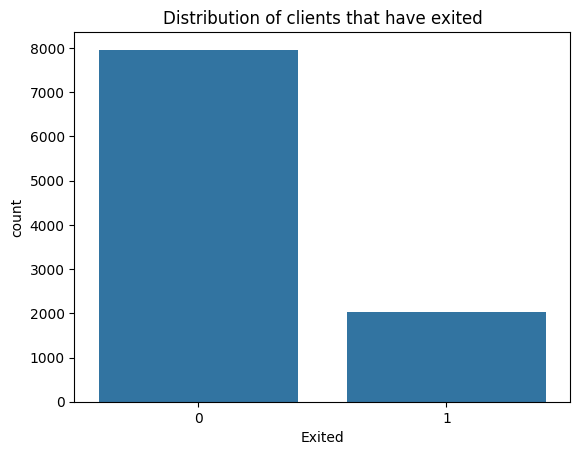

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [8]:
# Distribucion de la variable objetivo 
sns.countplot(x = 'Exited', data = data_clean) 
plt.title('Distribution of clients that have exited')
plt.show()

# Porcentaje de la variable objetivo 
print(data_clean['Exited'].value_counts(normalize=True) * 100)

### Interpretacion 
- El ~80% de usuarios no han abandonado
- El ~20% de usuarios han abandonado
- Existe un desequilibrio significativo que debe abordarse 

# Division de datos en conjuntos de entrenamiento, validacion y prueba

In [9]:
# Separacion de variables dependientes e independientes
x = data_clean.drop('Exited', axis = 1) 
y = data_clean['Exited'] 

scaler = StandardScaler() 
x = scaler.fit_transform(x) 
x = pd.DataFrame(x, columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
                             'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male'])

In [10]:
# Separacion de datos de entrenamiento y prueba 
x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size = 0.25, random_state = 12345)
x_test, x_valid, y_test, y_valid = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 12345) 

# Entrenamiento Inicial sin Abordar el Desequilibrio

In [11]:
# Iniziaclizacion del modelo de Decision Tree desequilibrado
dt_model = DecisionTreeClassifier(random_state = 12345) 
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_valid) 

f1_dt_unbalanced = metrics.f1_score(y_valid, y_pred)

print(f'Decision Tree f1 socre of {f1_dt_unbalanced}')

Decision Tree f1 socre of 0.4955116696588869


In [12]:
# Iniziaclizacion del modelo de Random Forest desequilibrado
model = RandomForestClassifier(random_state = 12345) 
model.fit(x_train, y_train) 

# Prediccion
y_pred = model.predict(x_valid)
f1_rf_unbalanced = metrics.f1_score(y_valid, y_pred)

print(f'Random Forest f1 score of {f1_rf_unbalanced}')

Random Forest f1 score of 0.5534883720930233


# Mejorando el Modelo: Abordando desequilibrio de Clases

## Arbol de decision con Pesos Balanceados

In [13]:
# Entrenar el modelo Decision Tree con pesos de clase ajustados 

dt_weighted = DecisionTreeClassifier(class_weight = 'balanced', random_state = 12345)
dt_weighted.fit(x_train, y_train) 

# Predicciones 
y_pred_weighted = dt_weighted.predict(x_valid) 

f1_dt_weighted = metrics.f1_score(y_valid, y_pred_weighted)

print(f'Decision Tree classifier F1 score with balanced weights: {f1_dt_weighted}')

Decision Tree classifier F1 score with balanced weights: 0.4915572232645403


## Bosque Aleatorio con Pesos Balanceados 

In [14]:
# Entrenar el modelo Random Forest con pesos de clase ajustados 

rf_weighted = RandomForestClassifier(class_weight='balanced', random_state = 12345)
rf_weighted.fit(x_train, y_train) 

# Predicciones
y_pred_weighted_rf = rf_weighted.predict(x_valid) 

f1_rf_weighted = metrics.f1_score(y_valid, y_pred_weighted_rf)
    
print(f'Random Forest Classifier F1 score with balanced weights: {f1_rf_weighted}')

Random Forest Classifier F1 score with balanced weights: 0.5441527446300716


# Upsampling 

In [15]:
def upsample(y, x, repeat): 
    x_zeros = x[y == 0]
    x_ones = x[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    y_upsampled = pd.concat([x_zeros]+[x_ones]*repeat)
    x_upsampled = pd.concat([y_zeros]+[y_ones]*repeat)

    x_upsampled, y_upsampled = shuffle(x_upsampled, y_upsampled, random_state = 12345) 

    return x_upsampled, y_upsampled

In [16]:
# Entrenar modelos Decision Tree con datos balanceados

y_upsampled, x_upsampled = upsample(y_train, x_train, 10) 

dt_upsampled = DecisionTreeClassifier(random_state=12345)
dt_upsampled.fit(x_upsampled, y_upsampled)

# Predicciones
y_pred_upsampled_dt = dt_upsampled.predict(x_valid) 

f1_dt_balanced = metrics.f1_score(y_valid, y_pred_upsampled_dt)

print(f'Decision Tree Classifier F1 score with upsampled data: {f1_dt_balanced}')

Decision Tree Classifier F1 score with upsampled data: 0.44660194174757284


In [17]:
# Entrenar modelo Random Forest con datos balanceados 

rf_upsampling = RandomForestClassifier(random_state=12345) 
rf_upsampling.fit(x_upsampled, y_upsampled) 

# Predicciones
y_pred_upsampled_rf = rf_upsampling.predict(x_valid)

f1_rf_balanced = metrics.f1_score(y_valid, y_pred_upsampled_rf)

print(f'Random Forest F1 score with upsampling: {f1_rf_balanced}')

Random Forest F1 score with upsampling: 0.5983606557377049


### Comparacion de resultados 

In [18]:
print('F1 score of the Decision Tree model with unbalanced classes: {:.4f}'.format(f1_dt_unbalanced))
print('F1 score of the Random Forest model with unbalanced classes: {:.4f}'.format(f1_rf_unbalanced))
print('F1 score of the Decision Tree model with balanced classes: {:.4f}'.format(f1_dt_weighted))
print('F1 score of the Random Forest model with balanced classes: {:.4f}'.format(f1_rf_weighted))
print('F1 score of the Decision Tree model with upsampled data: {:.4f}'.format(f1_dt_balanced))
print('F1 score of the Random Forest model with upsampled data: {:.4f}'.format(f1_rf_balanced))


F1 score of the Decision Tree model with unbalanced classes: 0.4955
F1 score of the Random Forest model with unbalanced classes: 0.5535
F1 score of the Decision Tree model with balanced classes: 0.4916
F1 score of the Random Forest model with balanced classes: 0.5442
F1 score of the Decision Tree model with upsampled data: 0.4466
F1 score of the Random Forest model with upsampled data: 0.5984


**Analisis de resultados** 

1. Árbol de Decisión vs. Bosque Aleatorio:

En todas las configuraciones (clases no balanceadas, clases balanceadas y datos sobremuestreados), el modelo de Bosque Aleatorio tiene un F1 Score más alto que el modelo de Árbol de Decisión. Esto sugiere que el Bosque Aleatorio es, en general, un modelo más robusto y efectivo para los datos.

2. Clases No Balanceadas vs. Clases Balanceadas:

En ambos modelos (Árbol de Decisión y Bosque Aleatorio), los F1 Scores son ligeramente menores cuando se balancean las clases. Esto puede ser indicativo de una menor efectividad en la captura de la minoría de la clase, pero podría mejorar otros aspectos de la clasificación, como la precisión.

3. Datos Sobremuestreados:

El uso de datos sobremuestreados parece tener un impacto negativo en el Árbol de Decisión, con el F1 Score más bajo de 0.4466.

Por otro lado, el modelo de Bosque Aleatorio con datos sobremuestreados tiene el F1 Score más alto de 0.5984. Esto sugiere que el modelo de Bosque Aleatorio se beneficia del sobremuestreo de datos, mejorando su capacidad para manejar la desbalance de clases.


Dado el análisis anterior, elegiría el modelo de Bosque Aleatorio con datos sobremuestreados. Este modelo ofrece el F1 Score más alto, lo cual indica un mejor equilibrio entre la precisión y el recall, y es el más adecuado para manejar el desbalance de clases en los datos.

# Optimizacion de hiperparametros


In [19]:
# Entrenar el modelo Random Forest con datos balanceados y ajuste de hiperparametros

max_depth = 0
est = 0
best_f1 = 0

for i in range(1,302,50): 
    for depth in range(1,21): 

        #Entrenar modelo balanceado y upsampled
        model = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=12345, class_weight='balanced')
        model.fit(x_upsampled, y_upsampled)

        # Predicciones 
        y_pred = model.predict(x_valid)

        # Calcular F1 score 
        f1 = metrics.f1_score(y_valid, y_pred) 

        # Actualizar el mejor F1 score
        if f1 > best_f1: 
            best_f1 = f1 
            max_depth = depth
            est = i

print(f'Best F1 score for n_estimators = {est} and max_depth = {max_depth} is f1_score = {best_f1}')


Best F1 score for n_estimators = 51 and max_depth = 10 is f1_score = 0.6442307692307693


# Evaluacion Final con el Conjunto de Prueba 

In [20]:
# Re entrenar el modelo con los mejores parametros en el conjunto de entrenamiento completo 
best_rf_final = RandomForestClassifier(n_estimators=est, max_depth=max_depth, class_weight = 'balanced', random_state=12345)
best_rf_final.fit(x_temp, y_temp) 

# Predicciones con el conjunto de prueba 
y_pred_test = best_rf_final.predict(x_test)

# Evaluacion del modelo
f1_test = metrics.f1_score(y_test, y_pred_test) 
roc_auc = metrics.roc_auc_score(y_test, y_pred_test) 

print(f'F1 score on the test set: {f1_test}')
print(f'ROC AUC score on the test set: {roc_auc}')

F1 score on the test set: 0.9060150375939849
ROC AUC score on the test set: 0.9439905077798451


### Matriz de confusion 

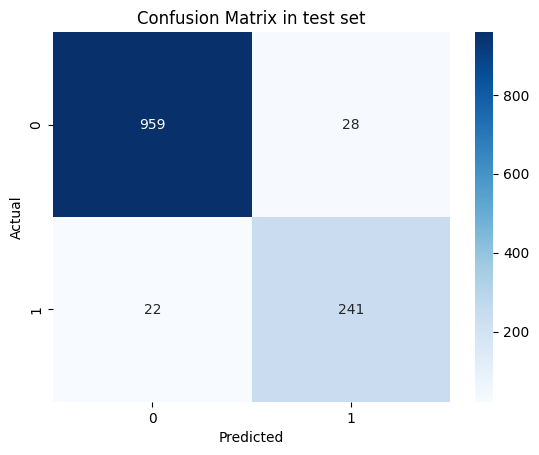

[[959  28]
 [ 22 241]]


In [21]:
# Matriz de confusion
cm = metrics.confusion_matrix(y_test, y_pred_test) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix in test set')
plt.show()

print(cm)

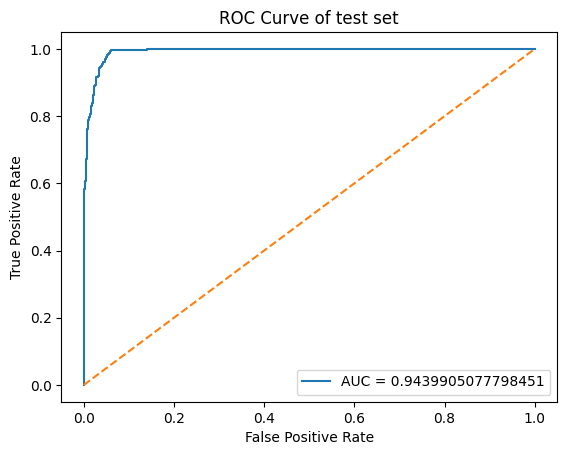

In [ ]:
# Curva ROC 
fpr, tpr, threshold = metrics.roc_curve(y_test,best_rf_final.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label = f'AUC = {roc_auc}')
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of test set')
plt.legend(loc ='lower right')
plt.show()

# Conclusiones 


En este proyecto se evaluo y se desarrollo un modelo de clasificacion utilizando un Bosque Aleatorio para predecir si un cliente se quedara o se ira. 

**Entrenamiento del modelo**

Se busco cual era el mejor modelo entre Random Forest y Decision Tree estando desequilibrado y equilibrado. Una vez que se consiguio el mejor resultado se hizo una optimizacion para encontrar los mejores hiperparametros lo cual se logro iterando a traves de varios diferentes valores. Una vez que se encontraron los mejores hiperparametros se entrena el modelo final con el conjunto de entrenamiento completo. 

***Evaluacion del modelo***

La puntuacion de F1 en el conjunto de prueba fue de 0.906. Esto nos indica que el modelo tiene un buen equilibrio entre precision y exactitud, lo que sugiere que es eficaz en la clasificacion de las muestras positivas y negativas. 

Puntuacion de ROC en el conjunto de prueba fue de 0.944. Esto nos indica que el modelo tiene una muy buena capacidad para clasificar siento muy bueno para predecir correctamente las clases positivas y negativas. 

***Matriz de confusion***

- Verdaderos negativos (TN): 959
- Falsos positivos (FP): 28
- Falsos negativos (FN): 22
- Verdaderos positivos (TP): 241

La matriz de confusion indica que el modelo tiene un buen rendimiento en la clasificacion de verdaderos negativos y verdaderos positivos, con valores relativamente bajos de falsos positivos y falsos negativos. 
